In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/g-research-crypto-forecasting/example_sample_submission.csv
/kaggle/input/g-research-crypto-forecasting/asset_details.csv
/kaggle/input/g-research-crypto-forecasting/example_test.csv
/kaggle/input/g-research-crypto-forecasting/train.csv
/kaggle/input/g-research-crypto-forecasting/supplemental_train.csv
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/competition.cpython-37m-x86_64-linux-gnu.so
/kaggle/input/g-research-crypto-forecasting/gresearch_crypto/__init__.py


In [2]:
import gresearch_crypto
import matplotlib.pyplot as plt

In [3]:
# Import the train data
df = pd.read_csv("/kaggle/input/g-research-crypto-forecasting/train.csv")

In [4]:
df.head()


,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [5]:
details = pd.read_csv("/kaggle/input/g-research-crypto-forecasting/asset_details.csv")

In [6]:
details.head(20)

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [7]:
df.head(8)

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.590000,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.530000,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.176000,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.657600,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.877000,121.087310,25.891363,-0.008264
5,1514764860,6,173.0,738.3025,746.0000,732.5100,738.507500,335.987856,738.839291,-0.004809
6,1514764860,9,167.0,225.3300,227.7800,222.9800,225.206667,411.896642,225.197944,-0.009791
7,1514764860,11,7.0,329.0900,329.8800,329.0900,329.460000,6.635710,329.454118,NaN


In [8]:
btc = df[df["Asset_ID"]==1].set_index("timestamp") # Asset_ID = 1 for Bitcoin
btc_mini = btc.iloc[-200:] # Select recent data rows

In [9]:
eth = df[df["Asset_ID"]==6].set_index("timestamp") # Asset_ID = 1 for Bitcoin
eth_mini = eth.iloc[-200:] # Select recent data rows

In [10]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=btc_mini.index, open=btc_mini['Open'], high=btc_mini['High'], low=btc_mini['Low'], close=btc_mini['Close'])])
fig.show()

In [11]:
fig1 = go.Figure(data=[go.Candlestick(x=eth_mini.index, open=eth_mini['Open'], high=eth_mini['High'], low=eth_mini['Low'], close=eth_mini['Close'])])
fig1.show()

### Ethereum Preprocessing

In [12]:
eth.info(show_counts =True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956200 entries, 1514764860 to 1632182400
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Asset_ID  1956200 non-null  int64  
 1   Count     1956200 non-null  float64
 2   Open      1956200 non-null  float64
 3   High      1956200 non-null  float64
 4   Low       1956200 non-null  float64
 5   Close     1956200 non-null  float64
 6   Volume    1956200 non-null  float64
 7   VWAP      1956200 non-null  float64
 8   Target    1955860 non-null  float64
dtypes: float64(8), int64(1)
memory usage: 149.2 MB


In [13]:
eth.isna().sum()

Asset_ID      0
Count         0
Open          0
High          0
Low           0
Close         0
Volume        0
VWAP          0
Target      340
dtype: int64

Checking missing data for each day 

60 is the normal time interval

In [14]:
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60     1956043
120        100
180         23
300          5
540          4
Name: timestamp, dtype: int64

In [15]:
eth = eth.reindex(range(eth.index[0],eth.index[-1]+60,60),method='pad')

In [16]:
(eth.index[1:]-eth.index[:-1]).value_counts().head()

60    1956959
Name: timestamp, dtype: int64

## Data visualisation
We will start by visualising the Close prices for the two assets we have selected.


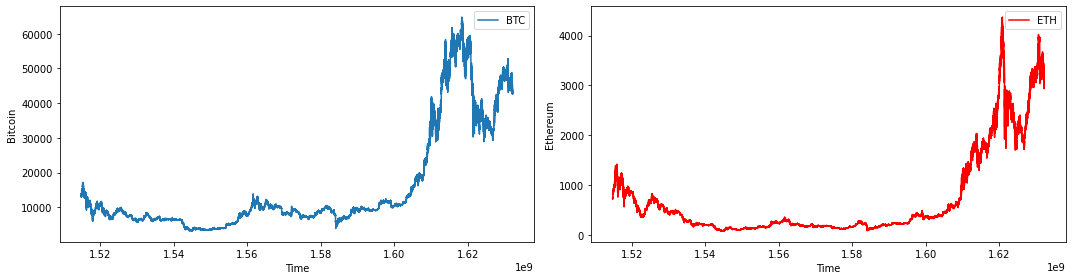

In [17]:
import matplotlib.pyplot as plt

# plot vwap time series for both chosen assets
f = plt.figure(figsize=(15,4))

# fill missing values for BTC
btc = btc.reindex(range(btc.index[0],btc.index[-1]+60,60),method='pad')

ax = f.add_subplot(121)
plt.plot(btc['Close'], label='BTC')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin')

ax2 = f.add_subplot(122)
ax2.plot(eth['Close'], color='red', label='ETH')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum')

plt.tight_layout()
plt.show()

Checking the correlation of BTC and ETH

In [18]:
import time
from datetime import datetime

# auxiliary function, from datetime to timestamp
totimestamp = lambda s: np.int32(time.mktime(datetime.strptime(s, "%d/%m/%Y").timetuple()))

# create intervals
btc_mini_2021 = btc.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]
eth_mini_2021 = eth.loc[totimestamp('01/06/2021'):totimestamp('01/07/2021')]

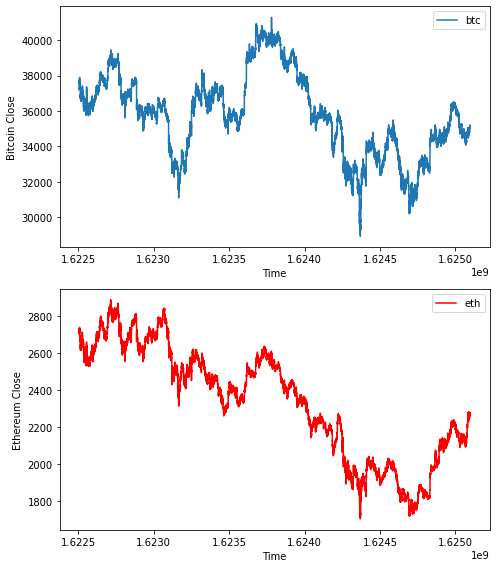

In [19]:
# plot time series for both chosen assets
f = plt.figure(figsize=(7,8))

ax = f.add_subplot(211)
plt.plot(btc_mini_2021['Close'], label='btc')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Bitcoin Close')

ax2 = f.add_subplot(212)
ax2.plot(eth_mini_2021['Close'], color='red', label='eth')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Ethereum Close')

plt.tight_layout()
plt.show()

## Log Returns


In order to analyze price changes for an asset we can deal with the price difference. However, different assets exhibit different price scales, so that the their returns are not readily comparable. We can solve this problem by computing the percentage change in price instead, also known as the return. This return coincides with the percentage change in our invested capital.

Returns are widely used in finance, however log returns are preferred for mathematical modelling of time series, as they are additive across time. Also, while regular returns cannot go below -100%, log returns are not bounded.

To compute the log return, we can simply take the logarithm of the ratio between two consecutive prices. The first row will have an empty return as the previous value is unknown, therefore the empty return data point will be dropped.

In [20]:
# define function to compute log returns
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

We can visualize the log return for our two assets. See how the signal now looks more like white noise, with less drift than the time series for prices.

In [21]:
import scipy.stats as stats


lret_btc = log_return(btc_mini_2021.Close)[1:]
lret_btc

timestamp
1622505660   -0.002039
1622505720    0.006600
1622505780    0.004084
1622505840    0.000348
1622505900    0.000457
                ...   
1625097360    0.000202
1625097420    0.000159
1625097480    0.000231
1625097540    0.000272
1625097600    0.000000
Name: Close, Length: 43200, dtype: float64

In [22]:
np.log(37281.598571)-np.log(37205.652857)

0.0020391607653760246

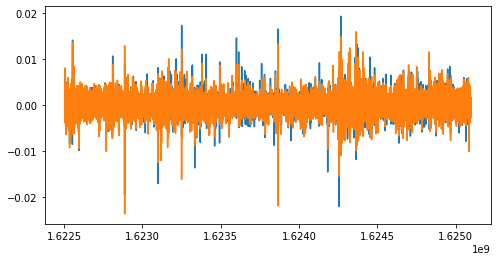

In [23]:
lret_eth = log_return(eth_mini_2021.Close)[1:]
lret_btc.rename('lret_btc', inplace=True)
lret_eth.rename('lret_eth', inplace=True)

plt.figure(figsize=(8,4))
plt.plot(lret_btc);
plt.plot(lret_eth);
plt.show()

## Correlation between assets

In [24]:
lret_btc

timestamp
1622505660   -0.002039
1622505720    0.006600
1622505780    0.004084
1622505840    0.000348
1622505900    0.000457
                ...   
1625097360    0.000202
1625097420    0.000159
1625097480    0.000231
1625097540    0.000272
1625097600    0.000000
Name: lret_btc, Length: 43200, dtype: float64

In [25]:
lret_eth

timestamp
1622505660   -0.001383
1622505720    0.008132
1622505780    0.000382
1622505840   -0.000077
1622505900    0.002026
                ...   
1625097360    0.000057
1625097420    0.000949
1625097480    0.000671
1625097540    0.000439
1625097600    0.000000
Name: lret_eth, Length: 43200, dtype: float64

In [26]:
log_returns_eth = pd.DataFrame(lret_eth)

In [27]:
log_returns_btc = pd.DataFrame(lret_btc)

In [28]:
lret_df = pd.merge(log_returns_eth,log_returns_btc,on="timestamp")

In [29]:
lret_df

,lret_eth,lret_btc
timestamp,,
1622505660,-0.001383,-0.002039
1622505720,0.008132,0.006600
1622505780,0.000382,0.004084
1622505840,-0.000077,0.000348
1622505900,0.002026,0.000457
...,...,...
1625097360,0.000057,0.000202
1625097420,0.000949,0.000159
1625097480,0.000671,0.000231


In [30]:
lret_df.corr()

,lret_eth,lret_btc
lret_eth,1.000000,0.856291
lret_btc,0.856291,1.000000


In [31]:
np.correlate(lret_eth,lret_btc)

array([0.07388393])

In [32]:
from scipy import signal

In [33]:
len(lret_btc)

43200

In [34]:
len(signal.correlate(lret_eth,lret_btc))

86399

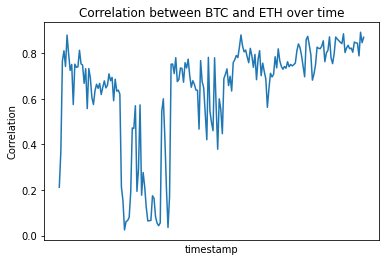

In [35]:
# join two asset in single DataFrame

lret_btc_long = log_return(btc.Close)[1:]
lret_eth_long = log_return(eth.Close)[1:]
lret_btc_long.rename('lret_btc', inplace=True)
lret_eth_long.rename('lret_eth', inplace=True)
two_assets = pd.concat([lret_btc_long, lret_eth_long], axis=1)

# group consecutive rows and use .corr() for correlation between columns
corr_time = two_assets.groupby(two_assets.index//(10000*60)).corr().loc[:,"lret_btc"].loc[:,"lret_eth"]

corr_time.plot();
plt.xticks([])
plt.ylabel("Correlation")
plt.title("Correlation between BTC and ETH over time");

In [36]:
asset_details=pd.read_csv("/kaggle/input/g-research-crypto-forecasting/asset_details.csv")

In [37]:
asset_details

,Asset_ID,Weight,Asset_Name
0,2,2.397895,Bitcoin Cash
1,0,4.304065,Binance Coin
2,1,6.779922,Bitcoin
3,5,1.386294,EOS.IO
4,7,2.079442,Ethereum Classic
5,6,5.894403,Ethereum
6,9,2.397895,Litecoin
7,11,1.609438,Monero
8,13,1.791759,TRON
9,12,2.079442,Stellar


In [38]:
df.head()

,timestamp,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
0,1514764860,2,40.0,2376.5800,2399.5000,2357.1400,2374.5900,19.233005,2373.116392,-0.004218
1,1514764860,0,5.0,8.5300,8.5300,8.5300,8.5300,78.380000,8.530000,-0.014399
2,1514764860,1,229.0,13835.1940,14013.8000,13666.1100,13850.1760,31.550062,13827.062093,-0.014643
3,1514764860,5,32.0,7.6596,7.6596,7.6567,7.6576,6626.713370,7.657713,-0.013922
4,1514764860,7,5.0,25.9200,25.9200,25.8740,25.8770,121.087310,25.891363,-0.008264


In [39]:
all_assets_2021 = pd.DataFrame([])
for asset_id, asset_name in zip(asset_details.Asset_ID, asset_details.Asset_Name):
  asset = df[df["Asset_ID"]==asset_id].set_index("timestamp")
  asset = asset.loc[totimestamp('01/01/2021'):totimestamp('01/05/2021')]
  asset = asset.reindex(range(asset.index[0],asset.index[-1]+60,60),method='pad')
  lret = log_return(asset.Close.fillna(0))[1:]
  all_assets_2021 = all_assets_2021.join(lret, rsuffix=asset_name, how="outer")

In [40]:
  all_assets_2021

,Close,CloseBinance Coin,CloseBitcoin,CloseEOS.IO,CloseEthereum Classic,CloseEthereum,CloseLitecoin,CloseMonero,CloseTRON,CloseStellar,CloseCardano,CloseIOTA,CloseMaker,CloseDogecoin
timestamp,,,,,,,,,,,,,,
1609459320,-0.001111,-0.001544,-0.001014,-0.000244,0.001606,-0.001350,-0.001231,-0.000671,-0.000697,-0.004668,-0.001161,0.000506,0.000180,-0.001016
1609459380,-0.000536,-0.001067,0.000090,0.000026,-0.000705,-0.000506,-0.000454,0.000192,-0.000946,-0.000205,-0.001886,-0.001351,-0.000689,-0.000086
1609459440,-0.000767,0.000011,-0.000175,-0.000019,-0.000512,-0.000669,-0.000211,-0.001376,-0.000187,0.001456,-0.002209,0.001351,0.001069,0.000096
1609459500,-0.001580,-0.002118,-0.001318,-0.001028,-0.000393,-0.001757,-0.001430,-0.000320,-0.000835,0.000455,-0.001515,-0.001182,0.000046,-0.000385
1609459560,-0.000151,-0.001865,0.000105,-0.000116,-0.001123,0.000035,0.000026,-0.000481,-0.000199,-0.000394,-0.000747,-0.001014,0.000759,0.000128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1619826900,0.001463,-0.000400,-0.000548,0.000485,-0.000731,-0.000101,0.000735,0.000521,0.001712,-0.000115,-0.000452,0.001298,-0.000584,0.000627
1619826960,0.001285,-0.000072,-0.000013,-0.000101,0.000043,0.000100,0.000673,-0.000160,-0.001664,0.000811,0.000199,0.000313,0.000258,-0.002353
1619827020,-0.001317,-0.000662,0.000114,0.000341,-0.001155,0.000587,-0.000006,0.001319,0.000903,-0.000376,-0.000062,0.001318,0.000398,-0.000323


In [41]:
asset_details.Asset_ID, asset_details.Asset_Name

(0      2
 1      0
 2      1
 3      5
 4      7
 5      6
 6      9
 7     11
 8     13
 9     12
 10     3
 11     8
 12    10
 13     4
 Name: Asset_ID, dtype: int64,
 0         Bitcoin Cash
 1         Binance Coin
 2              Bitcoin
 3               EOS.IO
 4     Ethereum Classic
 5             Ethereum
 6             Litecoin
 7               Monero
 8                 TRON
 9              Stellar
 10             Cardano
 11                IOTA
 12               Maker
 13            Dogecoin
 Name: Asset_Name, dtype: object)

In [42]:
corr = all_assets_2021.corr()[:13]
corr.style.background_gradient(cmap='coolwarm')
# plt.yticks(range(14), asset_details.Asset_Name.values);
# plt.xticks(range(14), asset_details.Asset_Name.values, rotation='vertical');
# plt.colorbar();

,Close,CloseBinance Coin,CloseBitcoin,CloseEOS.IO,CloseEthereum Classic,CloseEthereum,CloseLitecoin,CloseMonero,CloseTRON,CloseStellar,CloseCardano,CloseIOTA,CloseMaker,CloseDogecoin
Close,1.000000,0.528535,0.668397,0.687284,0.280523,0.694308,0.739045,0.536247,0.533490,0.513843,0.554523,0.430126,0.441942,0.264605
CloseBinance Coin,0.528535,1.000000,0.552438,0.520331,0.217757,0.555004,0.550942,0.459854,0.443682,0.436564,0.503102,0.395007,0.392032,0.218515
CloseBitcoin,0.668397,0.552438,1.000000,0.590395,0.244929,0.808571,0.732416,0.555275,0.498138,0.517695,0.577373,0.439920,0.455475,0.295093
CloseEOS.IO,0.687284,0.520331,0.590395,1.000000,0.272892,0.619467,0.655300,0.510208,0.561618,0.519521,0.536683,0.423243,0.415298,0.248993
CloseEthereum Classic,0.280523,0.217757,0.244929,0.272892,1.000000,0.261277,0.271644,0.220836,0.222593,0.209983,0.221725,0.183346,0.184502,0.108567
CloseEthereum,0.694308,0.555004,0.808571,0.619467,0.261277,1.000000,0.754474,0.556682,0.517412,0.536905,0.601954,0.453711,0.493190,0.282657
CloseLitecoin,0.739045,0.550942,0.732416,0.655300,0.271644,0.754474,1.000000,0.548028,0.531681,0.526598,0.584526,0.438804,0.452517,0.273803
CloseMonero,0.536247,0.459854,0.555275,0.510208,0.220836,0.556682,0.548028,1.000000,0.433135,0.443294,0.483596,0.382971,0.396857,0.214233
CloseTRON,0.533490,0.443682,0.498138,0.561618,0.222593,0.517412,0.531681,0.433135,1.000000,0.432952,0.464596,0.373290,0.371186,0.217022
CloseStellar,0.513843,0.436564,0.517695,0.519521,0.209983,0.536905,0.526598,0.443294,0.432952,1.000000,0.545413,0.380862,0.378826,0.211031


## Feature Engineering

In [43]:
# Select some input features from the trading data: 
# 5 min log return, abs(5 min log return), upper shadow, and lower shadow.
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low

X_btc = pd.concat([log_return(btc.VWAP,periods=5), log_return(btc.VWAP,periods=1).abs(), 
               upper_shadow(btc), lower_shadow(btc)], axis=1)
y_btc = btc.Target

X_eth = pd.concat([log_return(eth.VWAP,periods=5), log_return(eth.VWAP,periods=1).abs(), 
               upper_shadow(eth), lower_shadow(eth)], axis=1)
y_eth = eth.Target

In [44]:
log_return(btc.VWAP,periods=5).head()

timestamp
1514764860   NaN
1514764920   NaN
1514764980   NaN
1514765040   NaN
1514765100   NaN
Name: VWAP, dtype: float64

In [45]:
log_return(btc.VWAP,periods=1).head()

timestamp
1514764860         NaN
1514764920    0.000961
1514764980   -0.002481
1514765040   -0.001629
1514765100   -0.003489
Name: VWAP, dtype: float64

In [46]:
X_btc

,VWAP,VWAP,0,1
timestamp,,,,
1514764860,NaN,NaN,163.624000,169.084000
1514764920,NaN,0.000961,217.264000,148.102000
1514764980,NaN,0.002481,176.500000,200.314000
1514765040,NaN,0.001629,196.488000,191.760000
1514765100,NaN,0.003489,189.900000,170.474000
...,...,...,...,...
1632182160,0.000074,0.001123,18.070849,20.752857
1632182220,-0.001954,0.001303,27.802857,19.845714
1632182280,-0.002773,0.000828,28.114286,29.820000


In [47]:
y_btc

timestamp
1514764860   -0.014643
1514764920   -0.015037
1514764980   -0.010309
1514765040   -0.008999
1514765100   -0.008079
                ...   
1632182160         NaN
1632182220         NaN
1632182280         NaN
1632182340         NaN
1632182400         NaN
Name: Target, Length: 1956960, dtype: float64

### Baseline Model

In [48]:
# Select some input features from the trading data: 
# 5 min log return, abs(5 min log return), upper shadow, and lower shadow.
upper_shadow = lambda asset: asset.High - np.maximum(asset.Close,asset.Open)
lower_shadow = lambda asset: np.minimum(asset.Close,asset.Open)- asset.Low

X_btc = pd.concat([log_return(btc.VWAP,periods=5), log_return(btc.VWAP,periods=1).abs(), 
               upper_shadow(btc), lower_shadow(btc)], axis=1)
y_btc = btc.Target

X_eth = pd.concat([log_return(eth.VWAP,periods=5), log_return(eth.VWAP,periods=1).abs(), 
               upper_shadow(eth), lower_shadow(eth)], axis=1)
y_eth = eth.Target

In [49]:
# select training and test periods
train_window = [totimestamp("01/05/2021"), totimestamp("30/05/2021")]
test_window = [totimestamp("01/06/2021"), totimestamp("30/06/2021")]

# divide data into train and test, compute X and y
# we aim to build simple regression models using a window_size of 1
X_btc_train = X_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  # filling NaN's with zeros
y_btc_train = y_btc.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  

X_btc_test = X_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 
y_btc_test = y_btc.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 

X_eth_train = X_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  
y_eth_train = y_eth.loc[train_window[0]:train_window[1]].fillna(0).to_numpy()  

X_eth_test = X_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 
y_eth_test = y_eth.loc[test_window[0]:test_window[1]].fillna(0).to_numpy() 

In [50]:
from sklearn.preprocessing import StandardScaler
# simple preprocessing of the data 
scaler = StandardScaler()

X_btc_train_scaled = scaler.fit_transform(X_btc_train)
X_btc_test_scaled = scaler.transform(X_btc_test)

X_eth_train_scaled = scaler.fit_transform(X_eth_train)
X_eth_test_scaled = scaler.transform(X_eth_test)

In [51]:
from sklearn.linear_model import LinearRegression

# implement basic ML baseline (one per asset)
lr = LinearRegression()
lr.fit(X_btc_train_scaled,y_btc_train)
y_pred_lr_btc = lr.predict(X_btc_test_scaled)

lr.fit(X_eth_train_scaled,y_eth_train)
y_pred_lr_eth = lr.predict(X_eth_test_scaled)

In [52]:
# implement more complex baseline (multiple input/output regression model)
from sklearn.multioutput import MultiOutputRegressor

# we concatenate X and y for both assets
X_both_train = np.concatenate((X_btc_train_scaled, X_eth_train_scaled), axis=1)
X_both_test = np.concatenate((X_btc_test_scaled, X_eth_test_scaled), axis=1)
y_both_train = np.column_stack((y_btc_train, y_eth_train))
y_both_test = np.column_stack((y_btc_test, y_eth_test))

# define the direct multioutput model and fit it
mlr = MultiOutputRegressor(LinearRegression())
mlr.fit(X_both_train,y_both_train)
y_pred_lr_both = mlr.predict(X_both_test)

In [53]:
y_pred_lr_both

array([[ 1.53969557e-04, -1.15113993e-04],
       [-2.85535835e-04, -1.20984750e-04],
       [-2.96076646e-04, -3.01339571e-04],
       ...,
       [ 1.41737080e-04,  9.90928371e-05],
       [ 5.47594467e-05,  6.20656884e-05],
       [-8.65492663e-05,  1.80678801e-04]])

In [54]:
X_btc_train_scaled

array([[-0.26709947, -0.77390908,  0.20138837,  0.39365161],
       [-1.03323927,  2.06432564, -0.01678808,  1.69933346],
       [-0.42835819,  1.28086633, -0.05820074,  0.3934196 ],
       ...,
       [ 0.4514015 , -0.18958589, -0.3255556 , -0.33171188],
       [ 0.31876144, -0.73462056, -0.44071345, -0.13973491],
       [ 0.08891148, -0.60131126, -0.41963918,  0.0605485 ]])

In [55]:
X_btc_test_scaled

array([[-0.12752338, -0.77390908, -0.35515698, -0.37720588],
       [-0.60390537,  1.42940227, -0.16845588, -0.53149502],
       [ 0.25952484,  2.2752424 , -0.37006204, -0.641062  ],
       ...,
       [ 0.26929192, -0.40749713, -0.56019068, -0.60686476],
       [ 0.22033623, -0.33365744, -0.57437934, -0.48033762],
       [ 0.40745871, -0.08864109, -0.49038043, -0.33243485]])

In [56]:
import tensorflow as tf

2023-01-05 19:39:56.022924: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2023-01-05 19:39:56.023054: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [57]:
from tensorflow.keras import models,layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
def initialize_model():
    model=models.Sequential()
    model.add(layers.LSTM(128,activation='tanh',return_sequences=False,unroll=True))
    model.add(layers.Dense(128,activation='relu'))
    model.add(layers.Dense(64,activation='relu'))
    model.add(layers.Dense(y_btc_train.shape[0],activation='tanh'))
    model.compile(loss='mse',optimizer='rmsprop',metrics='accuracy')
    return model

model=initialize_model()

2023-01-05 19:40:01.579690: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-05 19:40:01.582674: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2023-01-05 19:40:01.582722: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-05 19:40:01.582754: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (55d0c8b0c1f6): /proc/driver/nvidia/version does not exist
2023-01-05 19:40:01.583883: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [59]:
es= EarlyStopping(monitor='val_accuracy',patience=50,restore_best_weights=True)

In [60]:
X_btc_train_scaled_expand =np.expand_dims(X_btc_train_scaled,axis=2)

In [61]:
X_btc_train_scaled_expand.shape

(41761, 4, 1)

In [62]:
X_btc_test_scaled_expand = np.expand_dims(X_btc_test_scaled,axis=2)

In [63]:
X_btc_test_scaled_expand.shape

(41761, 4, 1)

In [64]:
y_btc_train

array([0.00306574, 0.00415549, 0.00444132, ..., 0.00194192, 0.002041  ,
       0.00101983])

In [65]:
tf.config.run_functions_eagerly(True)

In [66]:
X_btc_train_scaled_expand.shape

(41761, 4, 1)

In [ ]:
results = model.fit(X_btc_train_scaled_expand,y_btc_train,validation_split=0.2,batch_size=16,epochs=1000,callbacks=[es],verbose=0)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning:

Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.

2023-01-05 19:40:01.870350: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-01-05 19:40:01.889067: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


In [ ]:
model.predict(X_btc_test_scaled_expand)

In [ ]:
results.